In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import signal
from sklearn.preprocessing import StandardScaler 

In [3]:
data_exc  = pd.read_csv("G:/My Drive/Cluster Feature files/all_data_wcond_exc.csv")
data_inh  = pd.read_csv("G:/My Drive/Cluster Feature files/all_data_wcond_inh.csv")
data_exc_ = data_exc[data_exc.columns[1:]] 
data_inh_ = data_inh[data_inh.columns[1:]] 


In [4]:
def return_class_with_cond(data,class_lab,cond):
    data_class = data[data['class'].isin(class_lab)]
    if cond in np.unique(data_class.cond):
        return data_class[data_class.cond.isin(['acsf',cond])]
    else:
        print(cond+' is not in this class')
data_d1 = return_class_with_cond(data_exc_,[0.0],'d1ago')


In [41]:
data_d1.columns

Index(['Vm_avg', 'dvdt_p', 'dvdt_n', 'avg_V', 'resistance', 'thr',
       'adaptation', 'isi', 'peak', 'peak_adaptation', 'ap_width', 'hyp_value',
       'fist_spike', 'up_down_ratio', 'isi_adaptation', 'thr_adp_ind', 'psth',
       'int_fr', 'fr', 'sub_thr', 'mi', 'spk_fr_adp', 'imp', 'exp_name',
       'cond', 'class'],
      dtype='object')

In [12]:
data_exc_[['Vm_avg', 'dvdt_p', 'dvdt_n', 'avg_V', 'resistance', 'thr',
       'adaptation', 'isi', 'peak', 'peak_adaptation', 'ap_width', 'hyp_value',
       'fist_spike', 'up_down_ratio', 'isi_adaptation', 'thr_adp_ind', 'psth',
       'int_fr', 'fr', 'sub_thr', 'mi', 'spk_fr_adp', 'imp']] = StandardScaler().fit_transform(data_exc_[['Vm_avg', 'dvdt_p', 'dvdt_n', 'avg_V', 'resistance', 'thr',
       'adaptation', 'isi', 'peak', 'peak_adaptation', 'ap_width', 'hyp_value',
       'fist_spike', 'up_down_ratio', 'isi_adaptation', 'thr_adp_ind', 'psth',
       'int_fr', 'fr', 'sub_thr', 'mi', 'spk_fr_adp', 'imp']])

data_inh_[['Vm_avg', 'dvdt_p', 'dvdt_n', 'avg_V', 'resistance', 'thr',
       'adaptation', 'isi', 'peak', 'peak_adaptation', 'ap_width', 'hyp_value',
       'fist_spike', 'up_down_ratio', 'isi_adaptation', 'thr_adp_ind', 'psth',
       'int_fr', 'fr', 'sub_thr', 'mi', 'spk_fr_adp', 'imp']] = StandardScaler().fit_transform(data_inh_[['Vm_avg', 'dvdt_p', 'dvdt_n', 'avg_V', 'resistance', 'thr',
       'adaptation', 'isi', 'peak', 'peak_adaptation', 'ap_width', 'hyp_value',
       'fist_spike', 'up_down_ratio', 'isi_adaptation', 'thr_adp_ind', 'psth',
       'int_fr', 'fr', 'sub_thr', 'mi', 'spk_fr_adp', 'imp']])


<ipython-input-12-29564e4366ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-12-29564e4366ac>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [6]:
np.unique(data_inh['cond'])

array(['acsf', 'agoanta', 'cirazoline', 'd1ago', 'd2', 'dopamine', 'm1',
       'sag'], dtype=object)

In [6]:
import sys
sys.path.append("C:/Users/Nishant Joshi/Downloads/Old_code/repo/single_cell_analysis/scripts")
from utils import loadmatInPy

In [37]:
# data_ = loadmatInPy('G:/My Drive/Analyzed/copy of '+exps[1]+'_analyzed.mat')
data_c1 = loadmatInPy('G:/My Drive/Analyzed/'+'asli_6-8-19_E1'+'_analyzed.mat')#NC_171017_aCSF_D1ago_E2

In [139]:
data_c2 = loadmatInPy('G:/My Drive/Analyzed/'+'NC_170623_aCSF_D1ago_E4'+'_analyzed.mat')#NC_171017_aCSF_D1ago_E2


data_c3 = loadmatInPy('G:/My Drive/Analyzed/'+'NC_170704_aCSF_D1ago_E2'+'_analyzed.mat')#NC_171017_aCSF_D1ago_E2



M1-ant+ago


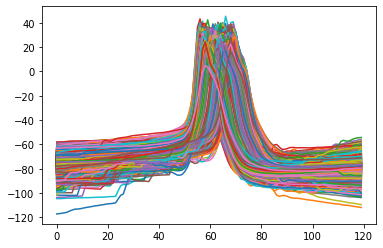

In [66]:
V   = data_c1[2]['membrane_potential']
I   = data_c1[2]['input_current']
thr = data_c1[2]['thresholdindices']
print(data_c1[2]['input_generation_settings']['condition'])
all_spikes = [] 
for th in thr:
    all_spikes.append(V[th-50:th+100])
    plt.plot(V[th-50:th+70])

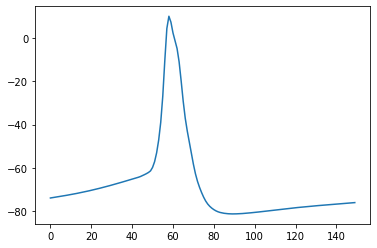

In [68]:
plt.plot(np.mean(all_spikes,axis=0))

In [35]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()
V = data_c1[0]['membrane_potential'][:data_c1[0]['thresholdindices'][0]-100]
I = data_c1[0]['input_current'][:data_c1[0]['thresholdindices'][0]-100].reshape((-1, 1))

model.fit(I, V)
slope = model.coef_

print(f"slope: {model.coef_}")

slope: [0.10585369]


In [8]:
np.mean(np.abs(data_c1[0]['membrane_potential'][:data_c1[0]['spikeindices'][0]]/data_c1[0]['input_current'][:data_c1[0]['spikeindices'][0]]))# plt.plot(data_c1[0]['input_current'][:data_c1[0]['spikeindices'][0]])


11.1916071535184

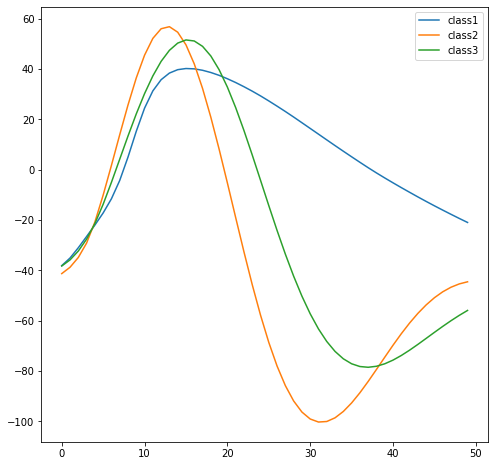

In [224]:
def return_avg_spikeshape(v,spk,thr):
    shapes = []
    for i in thr:
        shapes.append(v[int(i):int(i)+50])

    return np.mean(shapes,axis=0)
def remove_nan(data):
  ind = ~np.isnan(data)
  data_ = data[ind]  
  return data_  
v_c1 = data_c1[0]['membrane_potential']
spks_c1 = data_c1[0]['spikeindices']
thr_c1 = data_c1[0]['thresholdindices']

v_c2 = data_c2[0]['membrane_potential']
spks_c2 = data_c2[0]['spikeindices']
thr_c2= data_c2[0]['thresholdindices']

v_c3 = data_c3[0]['membrane_potential']
spks_c3 = data_c3[0]['spikeindices']
thr_c3= remove_nan(data_c3[0]['thresholdindices'])

fig,ax = plt.subplots(1,1,figsize=[8,8])
ax.plot(return_avg_spikeshape(v_c1,spks_c1,thr_c1))
# ax.show()
ax.plot(return_avg_spikeshape(v_c2,spks_c2,thr_c2))
# ax.show()
ax.plot(return_avg_spikeshape(v_c3,spks_c3,thr_c3))
ax.legend(['class1','class2','class3'])
plt.savefig('C:/Users/Nishant Joshi/Documents/DNM/spikeshapes.png',dpi=200)

# for i in thr_c2:
#     plt.plot(v_c2[i:i+50])

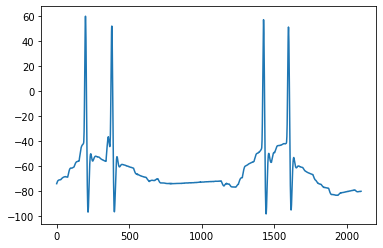

In [193]:
plt.plot(v_c2[spks_c2[0]-200:spks_c2[3]+500])

In [26]:
len(np.arange(0,len(data_[0]['membrane_potential'])*(1/20),1/20))

7200000

In [37]:
data_[0]['membrane_potential'][:(len(data_[0]['membrane_potential'])//6)]

array([-71.06249779, -71.03125006, -71.03125006, ..., -73.74999672,
       -73.68750125, -73.71874899])

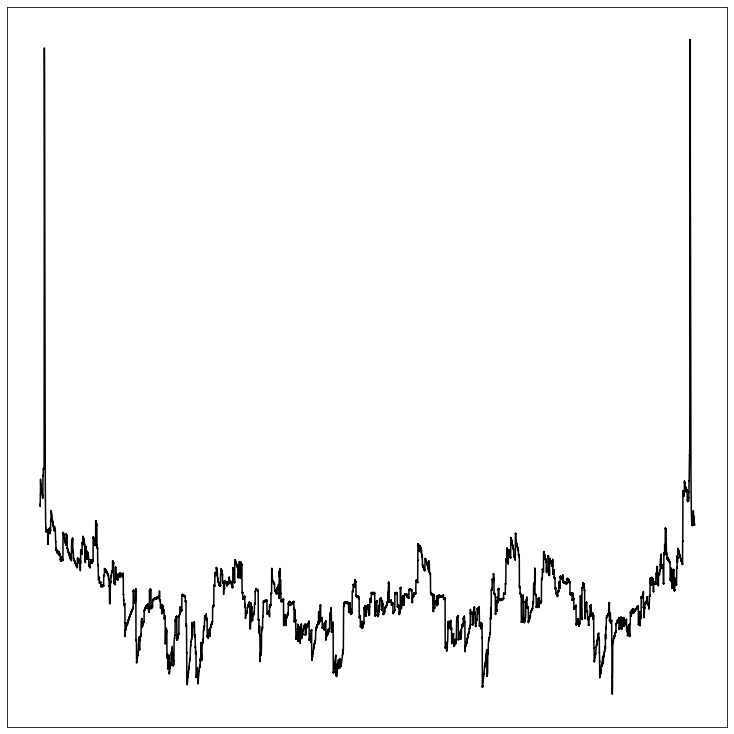

In [149]:
fig  =  plt.figure(frameon=False,figsize=[10,10])
ax = fig.add_axes([0, 0, 1, 1])
plt.plot(data_c1[0]['membrane_potential'][data_c1[0]['spikeindices'][0]-250:data_c1[0]['spikeindices'][1]+250],c='black')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

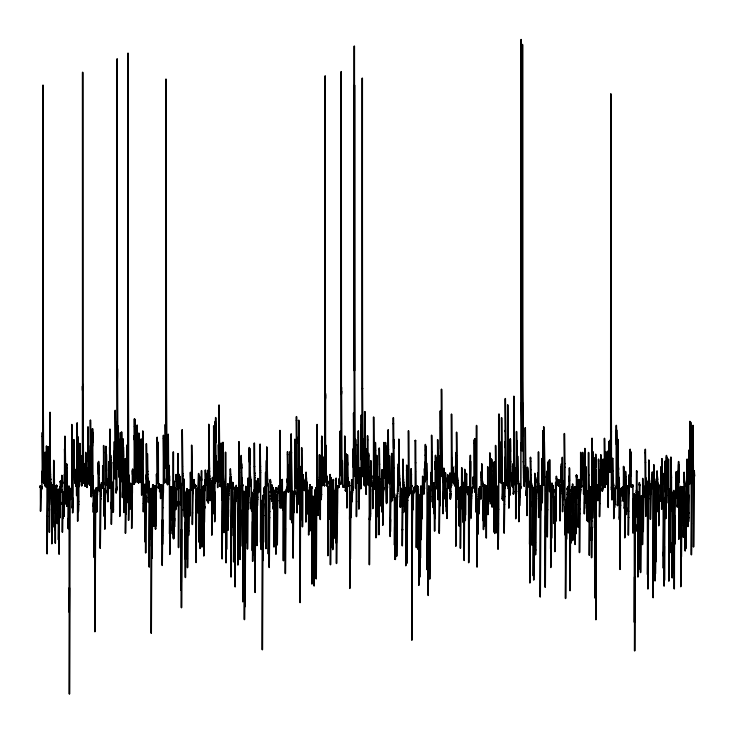

In [8]:
fig  =  plt.figure(frameon=False,figsize=[10,10])
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(np.arange(0,(len(data_[0]['membrane_potential'])//10)*(1/20),1/20),data_[0]['membrane_potential'][:len(data_[0]['membrane_potential'])//10],c='black')
# plt.xlabel('Time (ms)',fontsize=12)
# plt.ylabel('Membrane potential (mV)',fontsize=12)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
for spine in ['top', 'right', 'left', 'bottom']:
   ax.spines[spine].set_visible(False)
plt.savefig('C:/Users/Nishant Joshi/Documents/DNM/spiketrain.png',dpi=200)

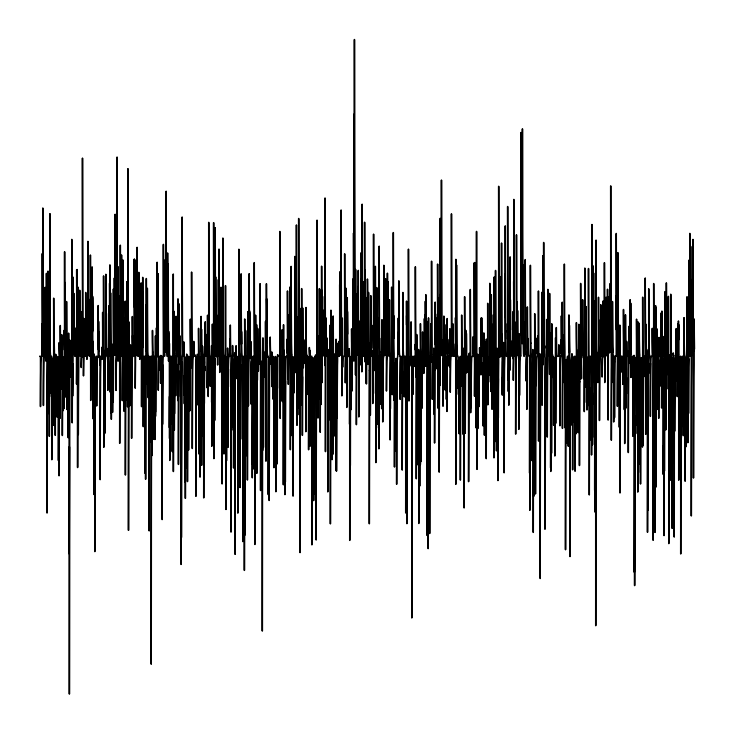

In [9]:
fig  =  plt.figure(figsize=[10,10])
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(np.arange(0,(len(data_[0]['input_current'])//10)*(1/20),1/20),data_[0]['input_current'][:len(data_[0]['membrane_potential'])//10],c='black')
# plt.xlabel('Time (ms)',fontsize=12)
# plt.ylabel('Membrane potential (mV)',fontsize=12)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
for spine in ['top', 'right', 'left', 'bottom']:
   ax.spines[spine].set_visible(False)
plt.savefig('C:/Users/Nishant Joshi/Documents/DNM/input.png',dpi=200)

<ipython-input-77-56c3797ca4d3>:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


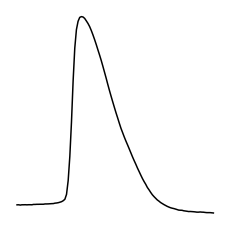

In [77]:
fig  =  plt.figure(frameon=False,figsize=[3,3])
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(data_[0]['membrane_potential'][-40+data_[0]['spikeindices'][0]:80+data_[0]['spikeindices'][0]],c='black')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
for spine in ['top', 'right', 'left', 'bottom']:
   ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.savefig('C:/Users/Nishant Joshi/Documents/DNM/spike.png',dpi=200)

In [10]:
from impedance import * 

def get_impedence(data, return_mean=True):
    """_summary_

    Args:
        data (list): _description_

    Returns:
        float: _description_
    """
    I_acsf = data['input_current']
    V_acsf = data['membrane_potential']
    spk_acsf, V_acsf, I_acsf = return_stiched_spike_train(data)
    imp = overdracht_wytse(0.01, I_acsf, V_acsf, 20001, 20001, 1)
    if return_mean:
        return np.mean(imp)
    else:
        return imp

imp = get_impedence(data_[0],return_mean=False)


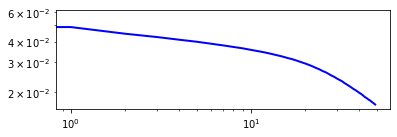

In [11]:

import pylab
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)

line, = ax.plot(imp[:50]/, color='blue', lw=2)

ax.set_yscale('log')

ax.set_xscale('log')
pylab.show()

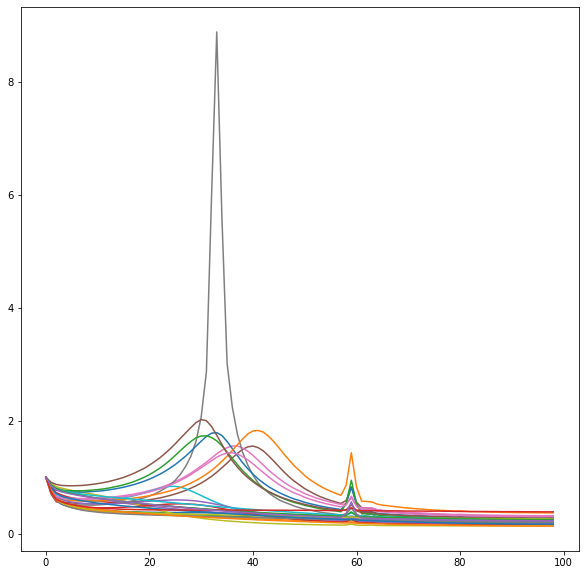

In [58]:
plt.figure(figsize=[10,10])
plt.plot((np.array(all['dop_exc'])/(np.array(all['dop_exc'])[:,0][:,None])).T)



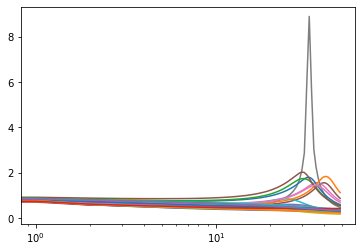

In [94]:
plt.plot(pd.DataFrame(np.array(all['dop_exc'])/(np.array(all['dop_exc'])[:,0][:,None])).iloc[:,:50].T)
plt.xscale('log')
# pd.DataFrame(np.array(all['dop_exc'])/(np.array(all['dop_exc'])[:,0][:,None])).iloc[:,:2]

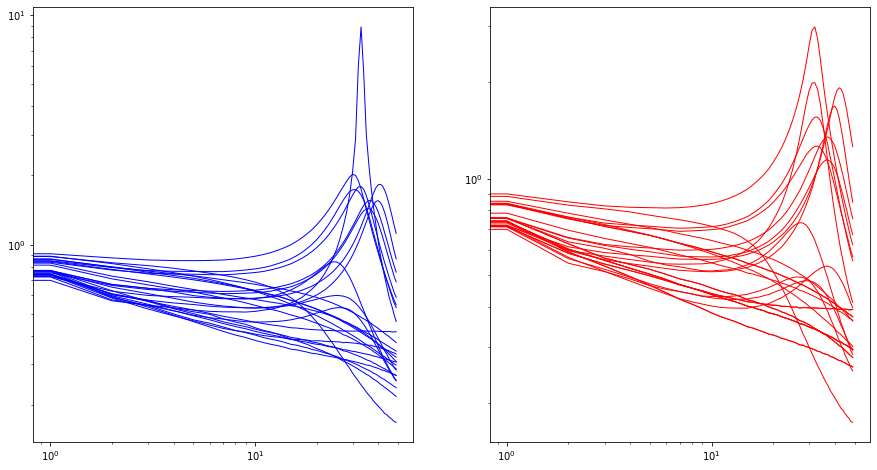

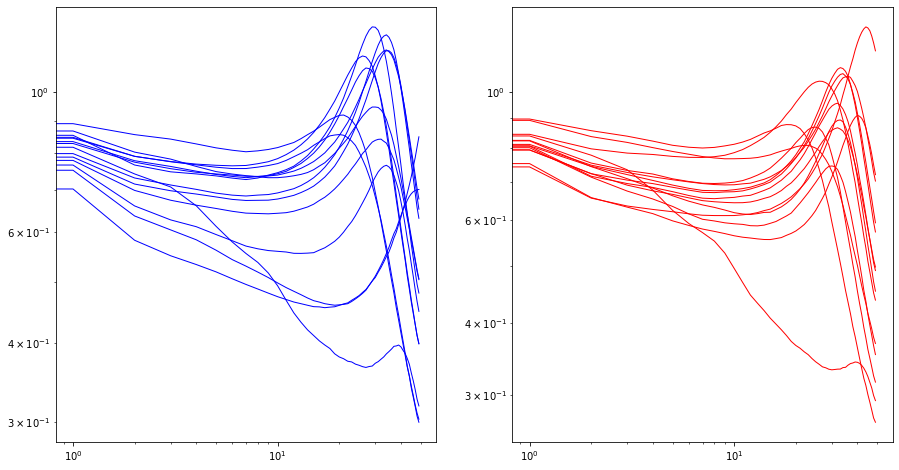

In [96]:
# pickle.load(open('G:/My Drive/Cluster Feature files/all_imp_acsf.p','wb'))



all = pickle.load(open('G:/My Drive/Cluster Feature files/all_imp.p', 'rb'))

import pylab
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2,figsize=[15,8])

# def divide_by_first(data):
#     for i in data:
        
ax[0].plot((np.array(all['dop_exc'])/(np.array(all['dop_exc'])[:,0][:,None]))[:,:50].T, color='blue', lw=1)
ax[1].plot((np.array(all['dop_exc_acsf'])/(np.array(all['dop_exc_acsf'])[:,0][:,None]))[:,:50].T, color='red', lw=1)

ax[0].set_yscale('log')
ax[0].set_xscale('log')


ax[1].set_yscale('log')
ax[1].set_xscale('log')
plt.show()

import pylab
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2,figsize=[15,8])


ax[0].plot((np.array(all['sag_exc'])/(np.array(all['sag_exc'])[:,0][:,None]))[:,:50].T, color='blue', lw=1)
ax[1].plot((np.array(all['sag_exc_acsf'])/(np.array(all['sag_exc_acsf'])[:,0][:,None]))[:,:50].T, color='red', lw=1)

ax[0].set_yscale('log')
ax[0].set_xscale('log')


ax[1].set_yscale('log')
ax[1].set_xscale('log')
plt.show()

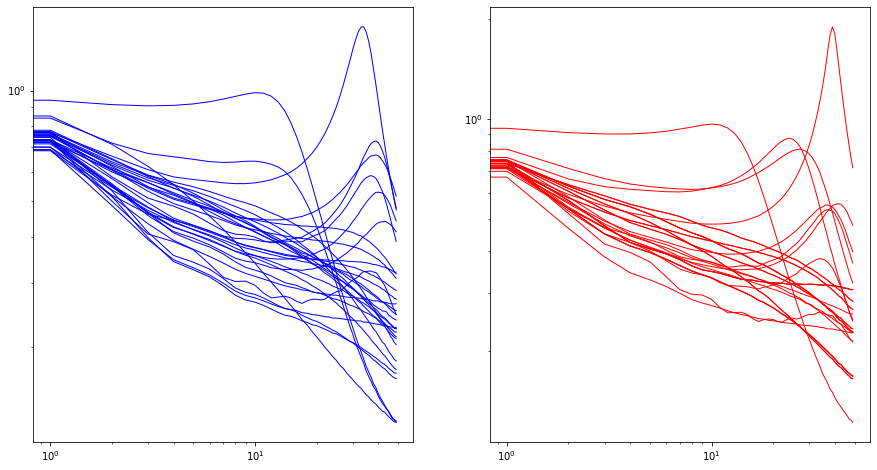

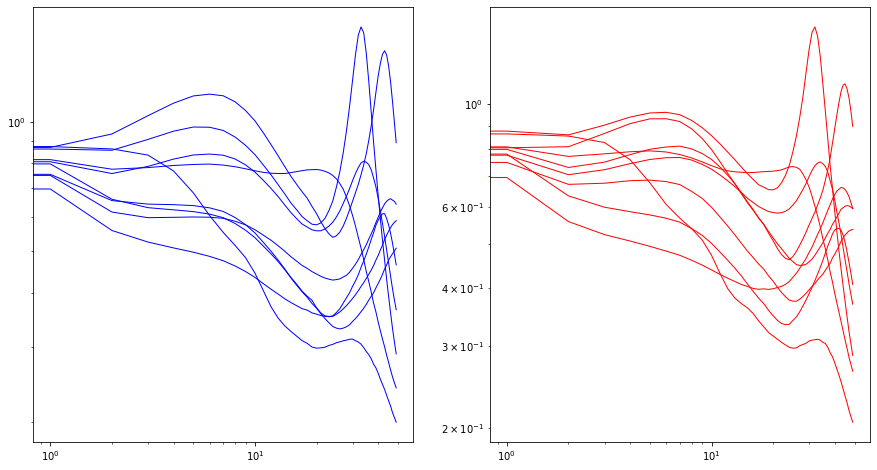

In [103]:
# pickle.load(open('G:/My Drive/Cluster Feature files/all_imp_acsf.p','wb'))



all = pickle.load(open('G:/My Drive/Cluster Feature files/all_imp.p', 'rb'))

import pylab
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2,figsize=[15,8])


ax[0].plot((np.array(all['dop_inh'])/np.array(all['dop_inh'])[:,0][:,None])[:,:50].T, color='blue', lw=1)
ax[1].plot((np.array(all['dop_inh_acsf'])/np.array(all['dop_inh_acsf'])[:,0][:,None])[:,:50].T, color='red', lw=1)

ax[0].set_yscale('log')
ax[0].set_xscale('log')


ax[1].set_yscale('log')
ax[1].set_xscale('log')
plt.show()

import pylab
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2,figsize=[15,8])


ax[0].plot((np.array(all['sag_inh'])/np.array(all['sag_inh'])[:,0][:,None])[:,:50].T, color='blue', lw=1)
ax[1].plot((np.array(all['sag_inh_acsf'])/np.array(all['sag_inh_acsf'])[:,0][:,None])[:,:50].T, color='red', lw=1)

ax[0].set_yscale('log')
ax[0].set_xscale('log')


ax[1].set_yscale('log')
ax[1].set_xscale('log')
plt.show()

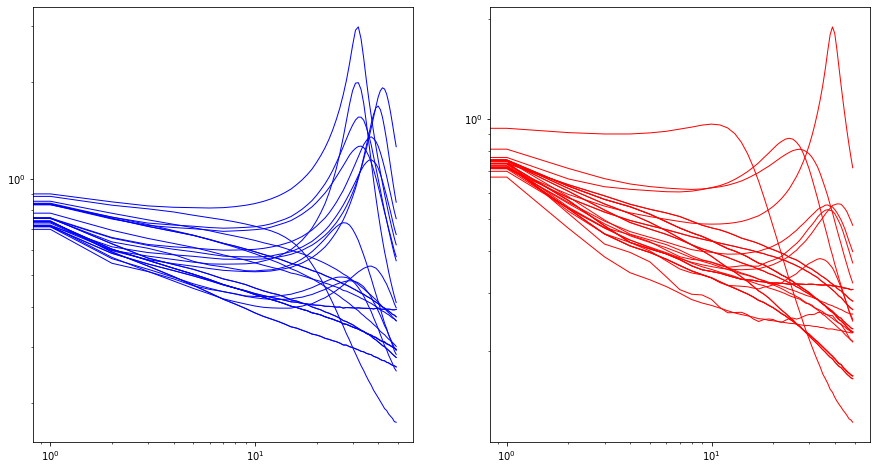

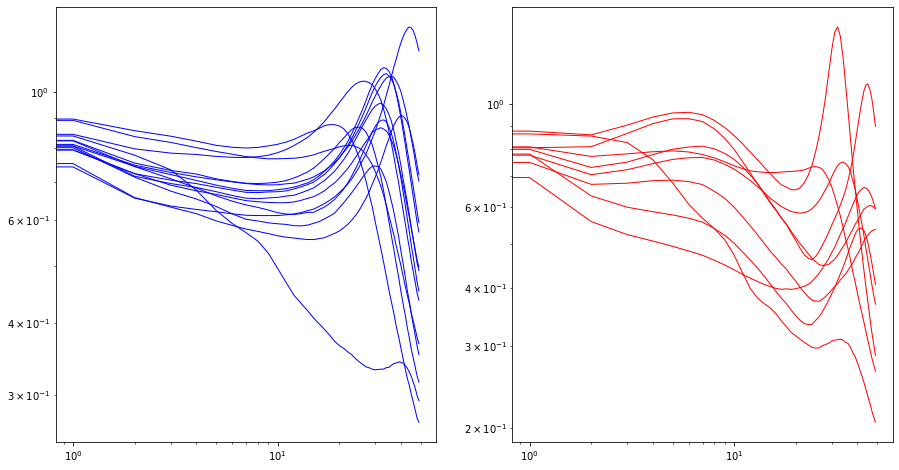

In [109]:
# pickle.load(open('G:/My Drive/Cluster Feature files/all_imp_acsf.p','wb'))



all = pickle.load(open('G:/My Drive/Cluster Feature files/all_imp.p', 'rb'))

import pylab
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2,figsize=[15,8])


ax[0].plot((np.array(all['dop_exc_acsf'])/np.array(all['dop_exc_acsf'])[:,0][:,None])[:,:50].T, color='blue', lw=1)
ax[1].plot((np.array(all['dop_inh_acsf'])/np.array(all['dop_inh_acsf'])[:,0][:,None])[:,:50].T, color='red', lw=1)

ax[0].set_yscale('log')
ax[0].set_xscale('log')


ax[1].set_yscale('log')
ax[1].set_xscale('log')
plt.show()

import pylab
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2,figsize=[15,8])


ax[0].plot((np.array(all['sag_exc_acsf'])/np.array(all['sag_exc_acsf'])[:,0][:,None])[:,:50].T, color='blue', lw=1)
ax[1].plot((np.array(all['sag_inh_acsf'])/np.array(all['sag_inh_acsf'])[:,0][:,None])[:,:50].T, color='red', lw=1)

ax[0].set_yscale('log')
ax[0].set_xscale('log')


ax[1].set_yscale('log')
ax[1].set_xscale('log')
plt.show()

In [ ]:
C93uMwva!hnGRa7

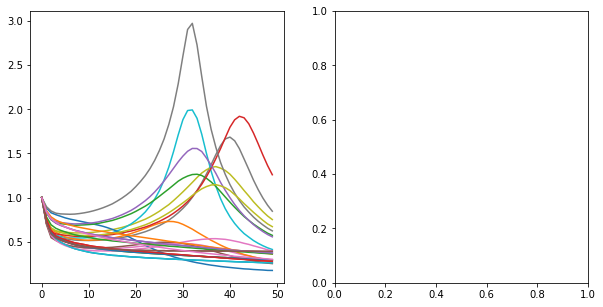

In [125]:
fig,ax = plt.subplots(1,2,figsize=[10,5])
sns.heatmap((np.array(all['dop_exc_acsf'])/np.array(all['dop_exc_acsf'])[:,0][:,None])[:,:50],ax=[0])
sns.heatmap((np.array(all['dop_exc'])/np.array(all['dop_exc'])[:,0][:,None])[:,:50],ax=[1])
plt.show()
fig,ax = plt.subplots(1,2)
sns.heatmap((np.array(all['dop_inh_acsf'])/np.array(all['dop_inh_acsf'])[:,0][:,None])[:,:50],ax=[0])
sns.heatmap((np.array(all['dop_inh'])/np.array(all['dop_inh'])[:,0][:,None])[:,:50],ax=[1])
plt.show()


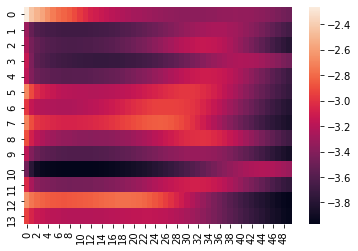

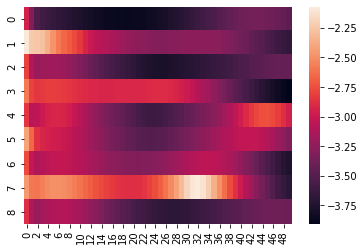

In [85]:
sns.heatmap(np.log(np.array(all['sag_exc_acsf'])[:,:50]))
plt.show()
sns.heatmap(np.log(np.array(all['sag_inh_acsf'])[:,:50]))
plt.show()

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part


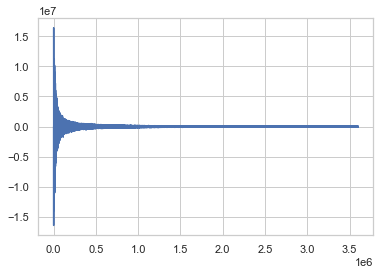

In [69]:
from scipy.io import loadmat                    # To load .mat files
from pylab import *  
# plt.plot(rfft(data[0]['spikeindices']*1/20000-np.mean(data[0]['spikeindices']*1/20000)))
plt.plot(rfft(data[0]['input_current']-np.mean(data[0]['input_current'])))

In [104]:
len(data[0]['input_current'])/20000

360.0

[1.+0.j 1.+0.j 1.+0.j ... 1.+0.j 1.+0.j 1.+0.j]
25001


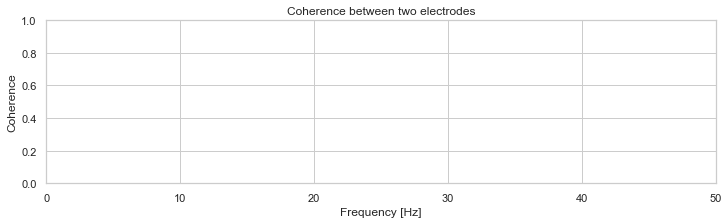

In [118]:
# Import our favorite functions and modules
from scipy.io import loadmat                    # To load .mat files
from pylab import *                             # Import plotting functions
rcParams['figure.figsize']=(12,3)               # Change the default figure size
# data = loadmat('matfiles/ECoG-1.mat')        # Load the data,
I = data[0]['input_current'][:50000]
V = data[0]['membrane_potential'][:50000]
E1 = I # ... from the first electrode,
E2 = V   # ... and from the second electrode.
dt = 1/20000                             # ... to get the sampling interval,
T =  len(E1)*dt                                  # ... and the total time of the recording.
N = len(E2)                              # Determine the number of sample points per trial
scale = 2 * dt**2 / T                        # Scaling constant

# Compute the Fourier transforms
xf = rfft(E1)  # ... for each trial in E1
yf = rfft(E2)  # ... and each trial in E2

# Compute the spectra
Sxx = scale * (xf * xf.conj())       # Spectrum of E1 trials
Syy = scale * (yf * yf.conj())       # ... and E2 trials
Sxy = scale * (xf * yf.conj())       # ... and the cross spectrum

# Compute the coherence.
cohr = abs(Sxy) / (sqrt(Sxx) * sqrt(Syy))
print(cohr)
f = rfftfreq(N, dt)                          # Define a frequency axis.
print(len(f))
plot(f, cohr.real)                           # Plot coherence vs frequency,
xlim([0, 50])                                # ... in a chosen frequency range,
ylim([0, 1])                                 # ... with y-axis scaled,
xlabel('Frequency [Hz]')                     # ... and with axes labeled.
ylabel('Coherence')
title('Coherence between two electrodes')
show()